In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\asus\AppData\Local\Temp\ipykernel_4488\4115130628.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
import pandas as pd

# Load the CSV file
file_path = './Human_vital_signs_R.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,Time (s),HR (BPM),RESP (BPM),SpO2 (%),TEMP (*C),OUTPUT
0,0,0,94.0,21.0,97.0,36.2,Normal
1,1,1,94.0,25.0,97.0,36.2,Normal
2,2,2,101.0,25.0,93.0,38.0,Abnormal
3,3,3,55.0,11.0,100.0,35.0,Abnormal
4,4,4,93.0,26.0,95.0,37.0,Normal


In [9]:
# Affichage des colonnes pour vérifier leurs noms exacts
data.columns

# Suppression des espaces supplémentaires dans les noms de colonnes
data.columns = data.columns.str.strip()


In [10]:
# Display the columns to verify their exact names
data.columns

Index(['Unnamed: 0', 'Time (s)', 'HR (BPM)', 'RESP (BPM)', 'SpO2 (%)',
       'TEMP (*C)', 'OUTPUT'],
      dtype='object')

In [14]:
# Sélection des colonnes pertinentes et nettoyage des données
X = data[['HR (BPM)', 'SpO2 (%)', 'TEMP (*C)']].dropna()
y = data['OUTPUT'].map({'Normal': 0, 'Abnormal': 1}).dropna()

C:\Users\asus\AppData\Local\Temp\ipykernel_4488\1911729897.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=['HR (BPM)', 'SpO2 (%)', 'TEMP (*C)'], palette='viridis')


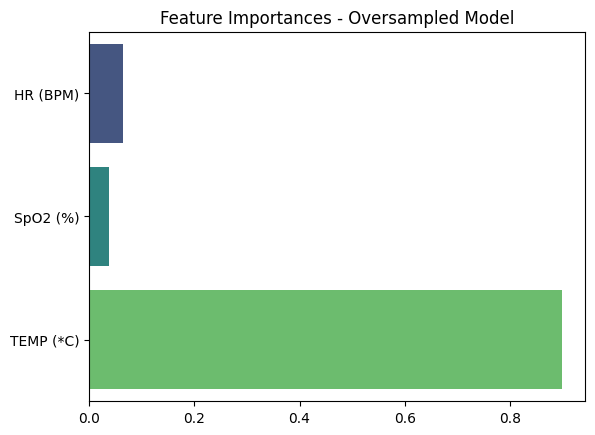

In [22]:
# Importance des caractéristiques
feature_importances = clf_oversampled.feature_importances_
sns.barplot(x=feature_importances, y=['HR (BPM)', 'SpO2 (%)', 'TEMP (*C)'], palette='viridis')
plt.title('Feature Importances - Oversampled Model')
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1191
           1       0.99      0.99      0.99      1122

    accuracy                           0.99      2313
   macro avg       0.99      0.99      0.99      2313
weighted avg       0.99      0.99      0.99      2313



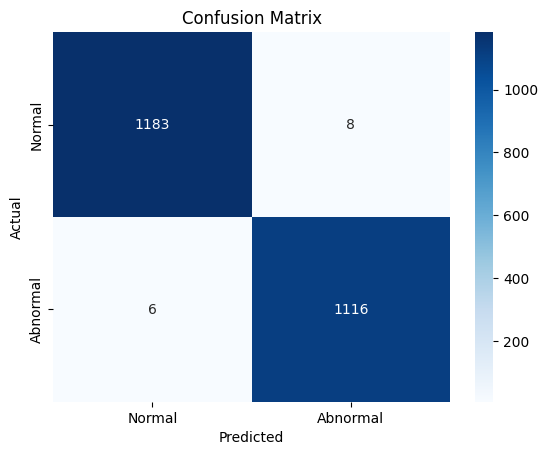

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement des données
file_path = './Human_vital_signs_R.csv'
data.columns = data.columns.str.strip()

X = data[['HR (BPM)', 'SpO2 (%)', 'TEMP (*C)']].dropna()
y = data['OUTPUT'].map({'Normal': 0, 'Abnormal': 1}).loc[X.index]

# Séparation des données par classe
X_normal = X[y == 0]
y_normal = y[y == 0]
X_abnormal = X[y == 1]
y_abnormal = y[y == 1]

# Trouver le nombre minimum d'échantillons dans les deux classes
min_samples = min(len(X_normal), len(X_abnormal))

# Extraire un nombre égal d'échantillons de chaque classe
X_normal_balanced = X_normal.sample(n=min_samples, random_state=42)
y_normal_balanced = y_normal.loc[X_normal_balanced.index]
X_abnormal_balanced = X_abnormal.sample(n=min_samples, random_state=42)
y_abnormal_balanced = y_abnormal.loc[X_abnormal_balanced.index]

# Combinaison des données équilibrées
X_balanced = pd.concat([X_normal_balanced, X_abnormal_balanced])
y_balanced = pd.concat([y_normal_balanced, y_abnormal_balanced])

# Division en ensembles de test et d'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Entraînement d'un modèle RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Affichage de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


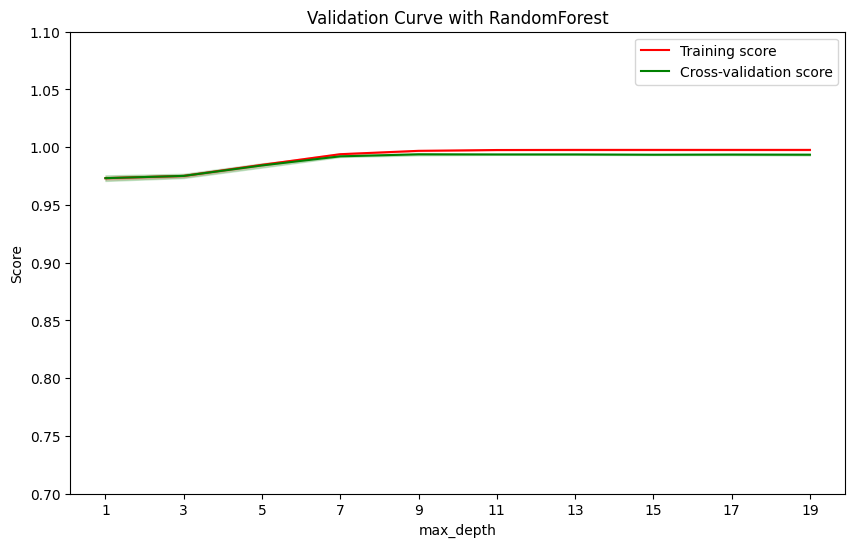

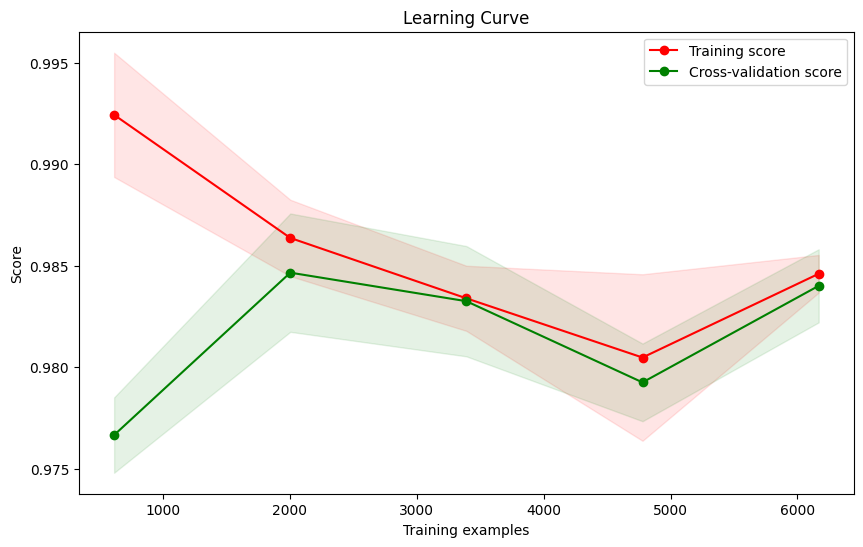

In [43]:
from sklearn.model_selection import learning_curve, validation_curve
import numpy as np

# 1. Courbe de Validation pour la profondeur de l'arbre
param_range = np.arange(1, 20, 2)  # Profondeurs de l'arbre à tester
train_scores, test_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train,
    y_train,
    param_name="max_depth",
    param_range=param_range,
    scoring="accuracy",
    cv=3
)

# Calculer les moyennes et les écarts-types du score d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Validation Curve with RandomForest")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.7, 1.1)
plt.xticks(param_range)
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.2)
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.2)
plt.legend(loc="best")
plt.show()

# 2. Courbe d'Apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(max_depth=5, random_state=42),  # Utiliser une profondeur optimale déterminée précédemment
    X_train,
    y_train,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Moyennes et écart type des scores d'entraînement
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="r", alpha=0.1)
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="g", alpha=0.1)
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


In [44]:
from sklearn.svm import SVC

model = SVC(kernel='linear')  # Vous pouvez essayer différents noyaux comme 'rbf' ou 'poly'
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1191
           1       0.97      0.97      0.97      1122

    accuracy                           0.97      2313
   macro avg       0.97      0.97      0.97      2313
weighted avg       0.97      0.97      0.97      2313



In [45]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, alpha=0.0001,
                     solver='adam', random_state=42, learning_rate_init=0.001)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1191
           1       0.95      0.97      0.96      1122

    accuracy                           0.96      2313
   macro avg       0.96      0.96      0.96      2313
weighted avg       0.96      0.96      0.96      2313



In [46]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1191
           1       0.99      0.99      0.99      1122

    accuracy                           0.99      2313
   macro avg       0.99      0.99      0.99      2313
weighted avg       0.99      0.99      0.99      2313



In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1191
           1       0.97      0.97      0.97      1122

    accuracy                           0.97      2313
   macro avg       0.97      0.97      0.97      2313
weighted avg       0.97      0.97      0.97      2313



In [48]:
from sklearn.tree import DecisionTreeClassifier

# Création du modèle d'arbre de décision
dt_model = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Évaluation du modèle
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1191
           1       0.99      0.99      0.99      1122

    accuracy                           0.99      2313
   macro avg       0.99      0.99      0.99      2313
weighted avg       0.99      0.99      0.99      2313

